11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 343ms/step - loss: 0.3603 - val_loss: 0.1054
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 291ms/step - loss: 0.1000 - val_loss: 0.0894
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 258ms/step - loss: 0.0888 - val_loss: 0.0842
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 270ms/step - loss: 0.0841 - val_loss: 0.0815
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 265ms/step - loss: 0.0817 - val_loss: 0.0795
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 264ms/step - loss: 0.0798 - val_loss: 0.0781
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 264ms/step - loss: 0.0786 - val_loss: 0.0770
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 269ms/step - loss: 0.0775 - val_loss: 0.0762
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 259ms/step - loss: 0.0767 - val_loss: 0.0756
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 272ms/step - loss: 0.0762 - val_loss: 0.0750
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 271ms/step - 

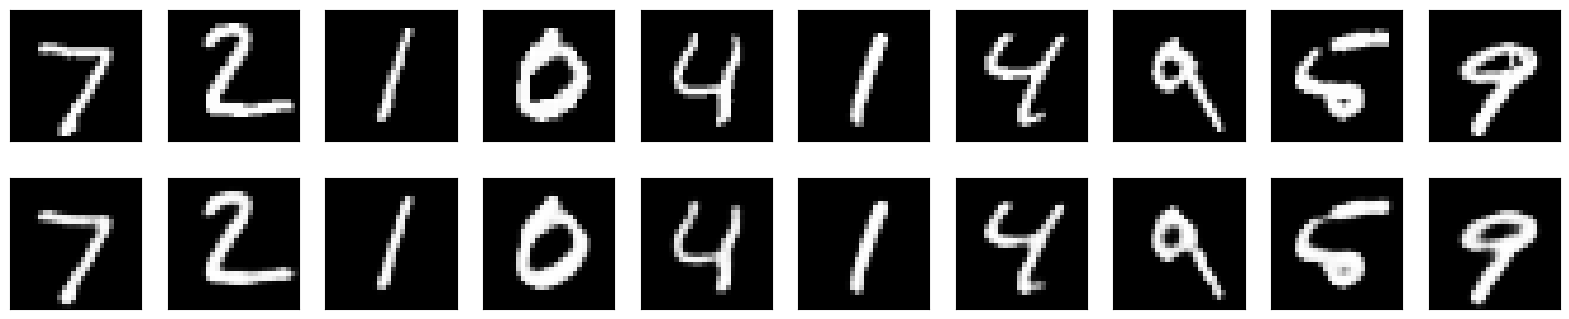

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Build the autoencoder
input_img = tf.keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Reconstruct the test images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
